In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

from dotenv import load_dotenv
load_dotenv(override=True)

ROOT_PATH = os.environ.get('ROOT_PATH')
if not ROOT_PATH in sys.path: sys.path.append(ROOT_PATH)

from main_code.utils.constants import *
from main_code.utils.CosmoFunc import *
from main_code.utils.functions import bin_data_median

from astropy import units as u
from astropy.coordinates import SkyCoord

SMIN_SETTING = int(os.environ.get('SMIN_SETTING'))
FP_FIT_METHOD = int(os.environ.get('FP_FIT_METHOD'))

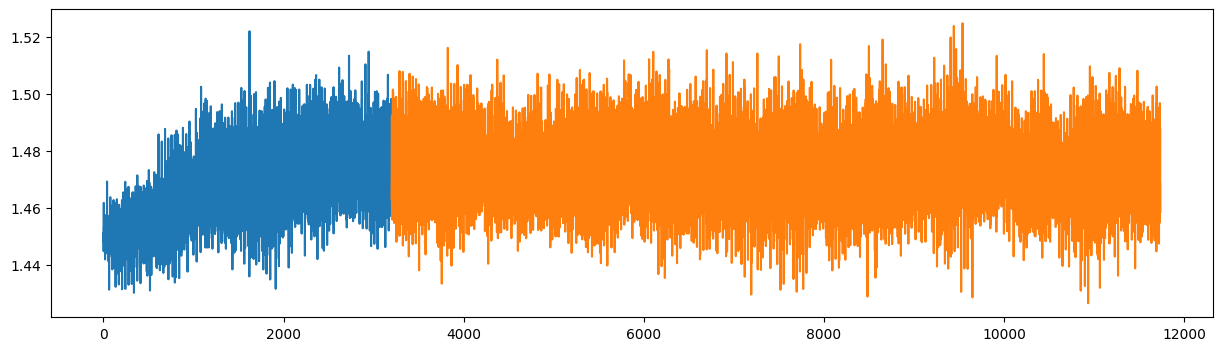

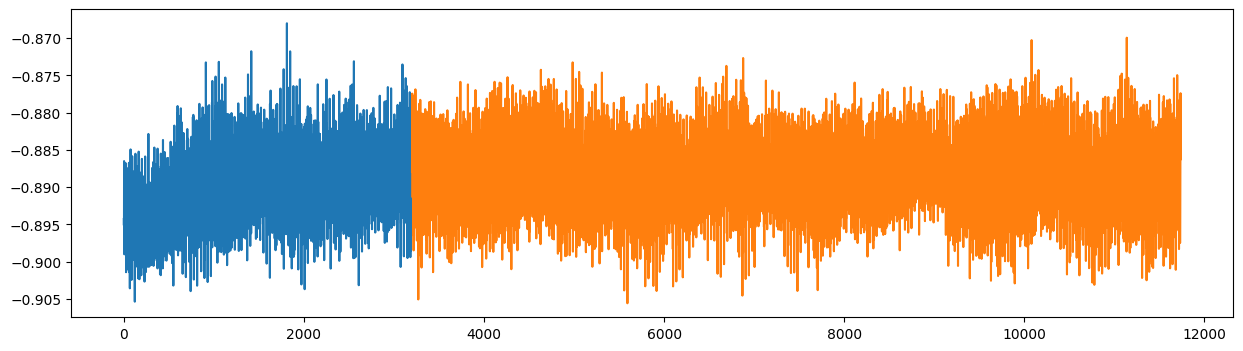

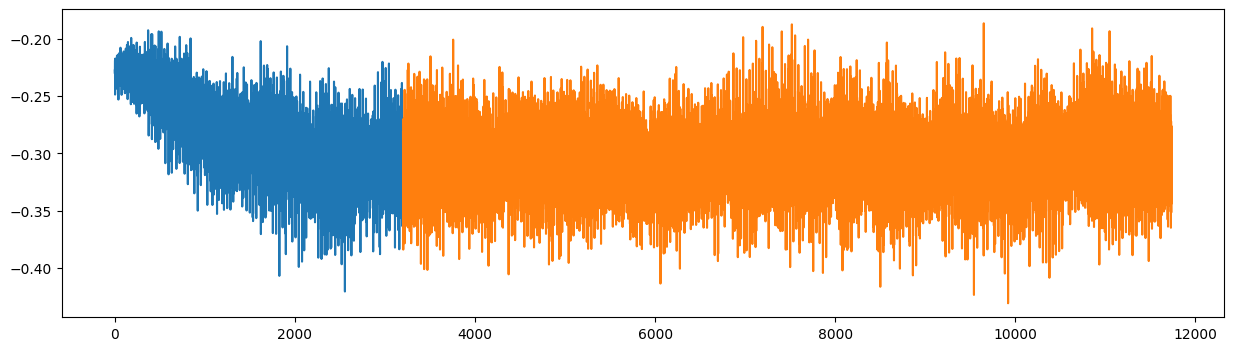

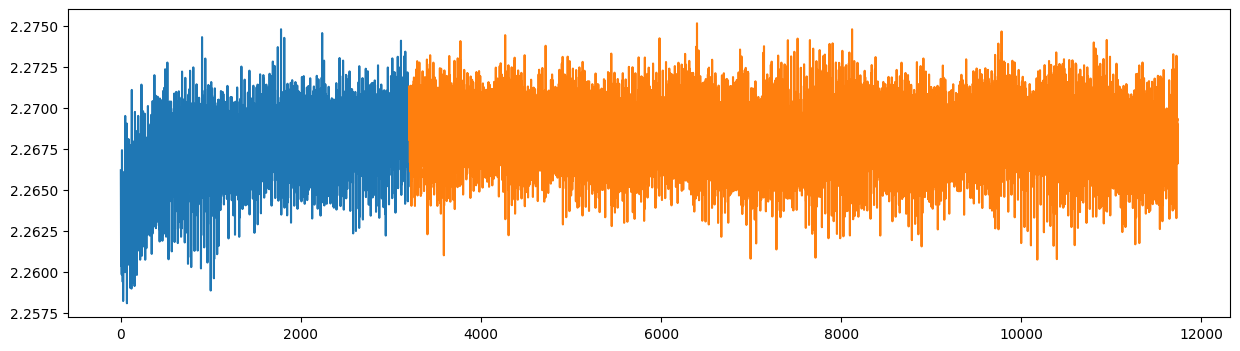

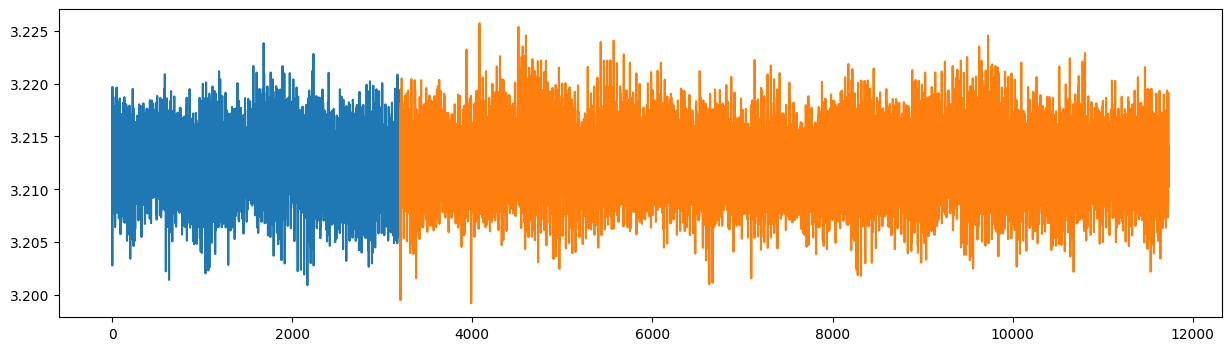

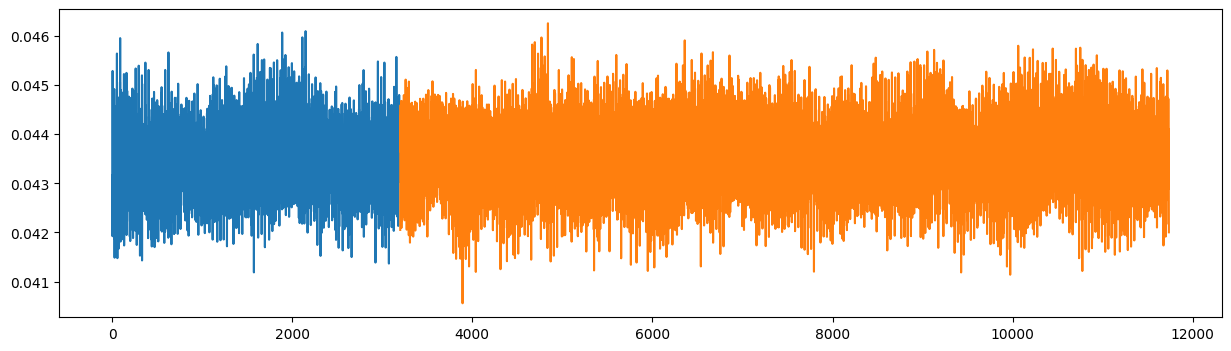

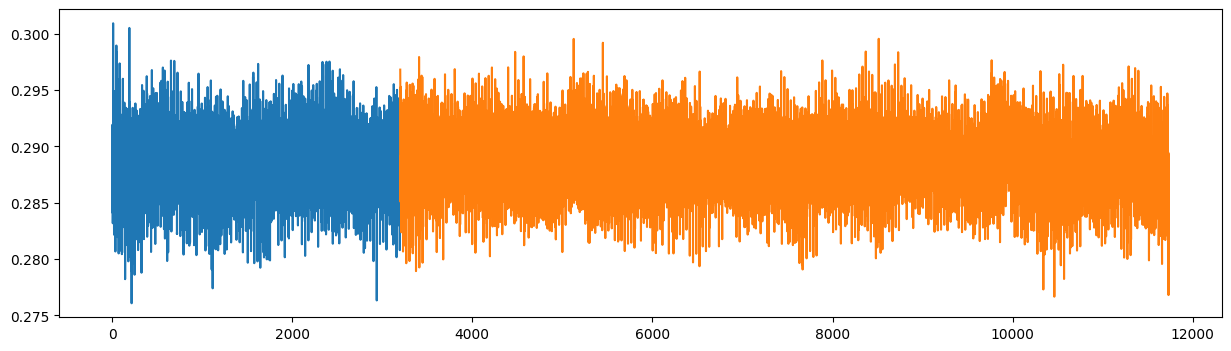

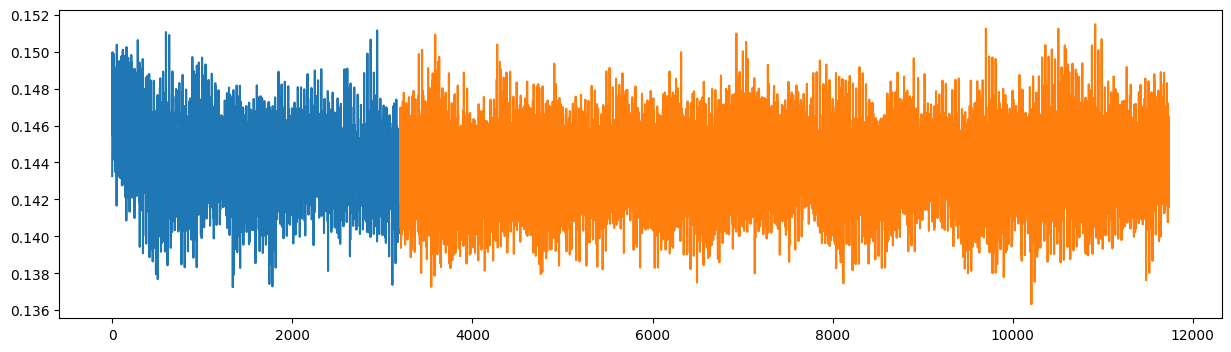

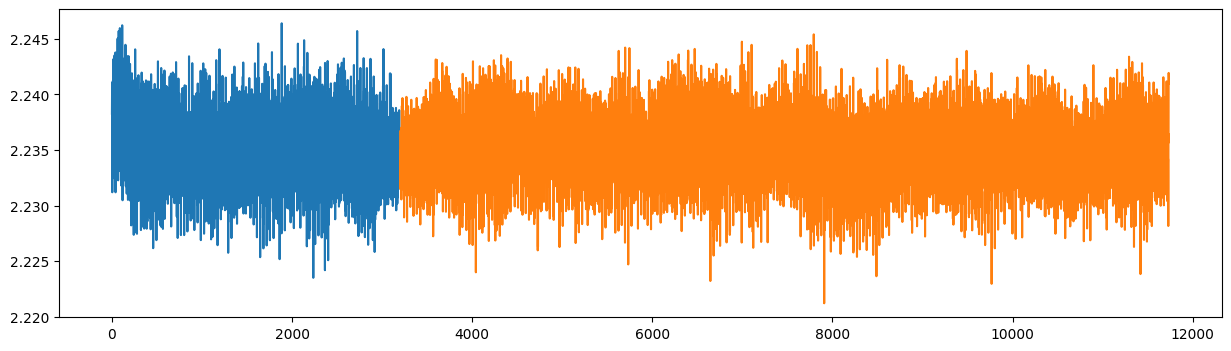

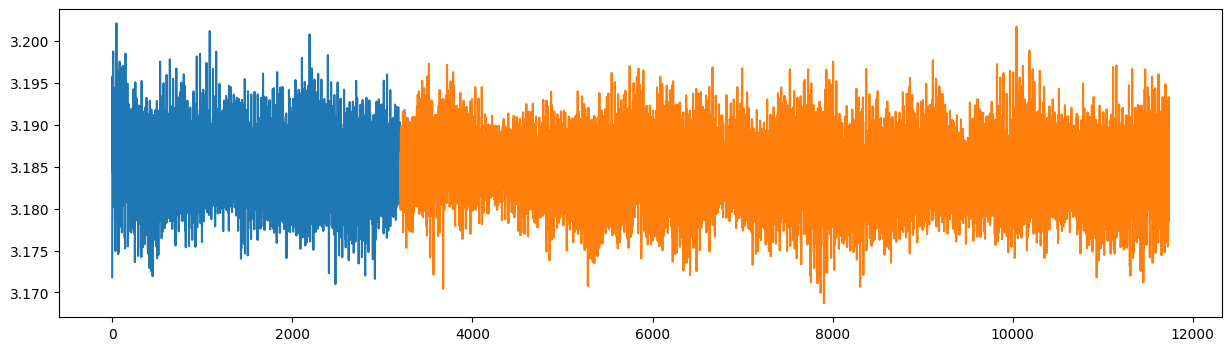

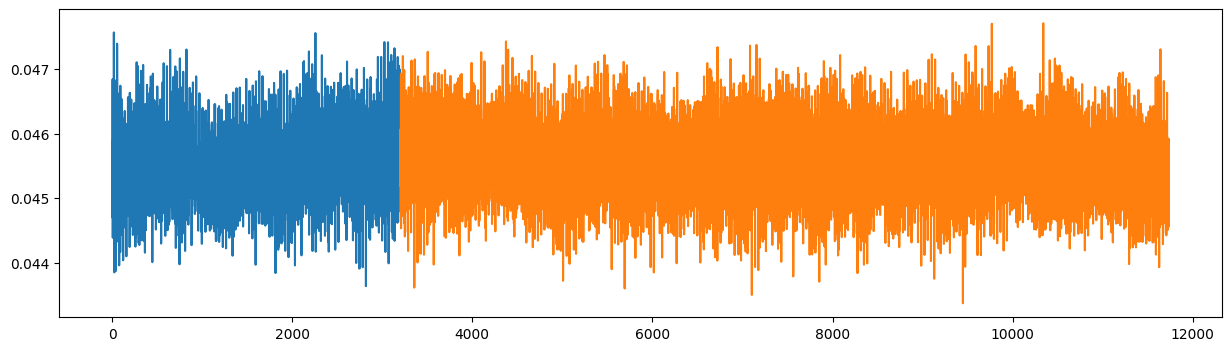

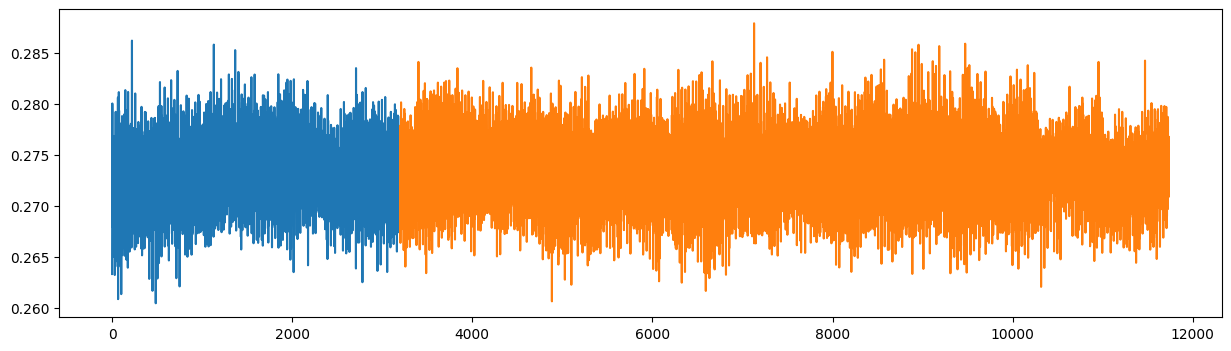

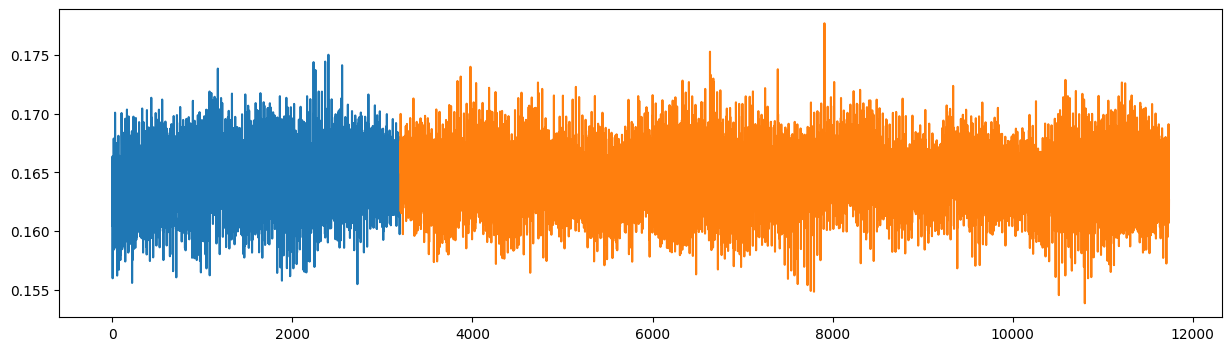

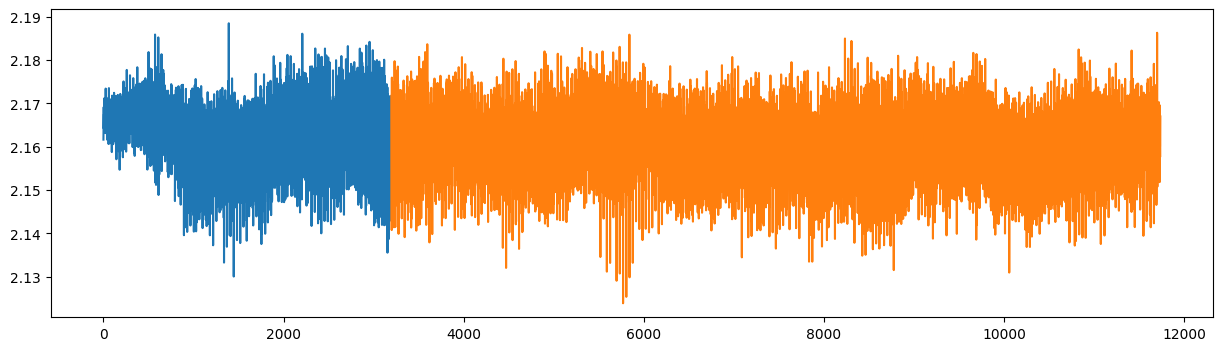

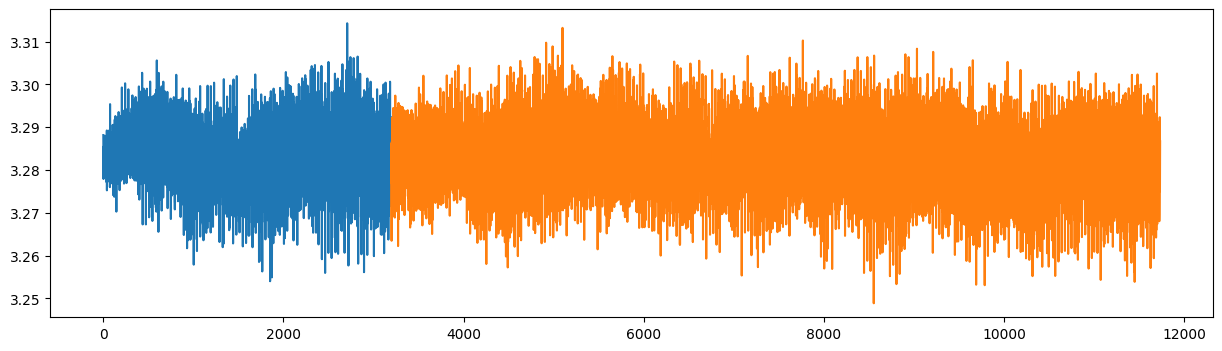

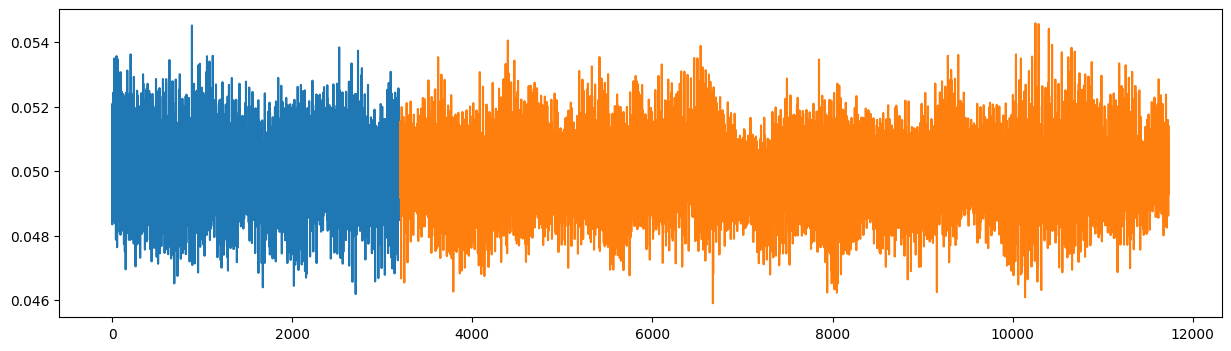

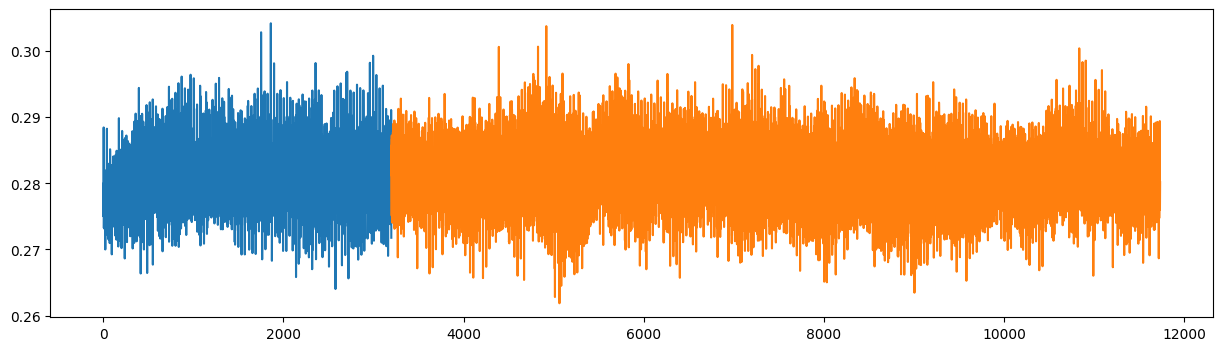

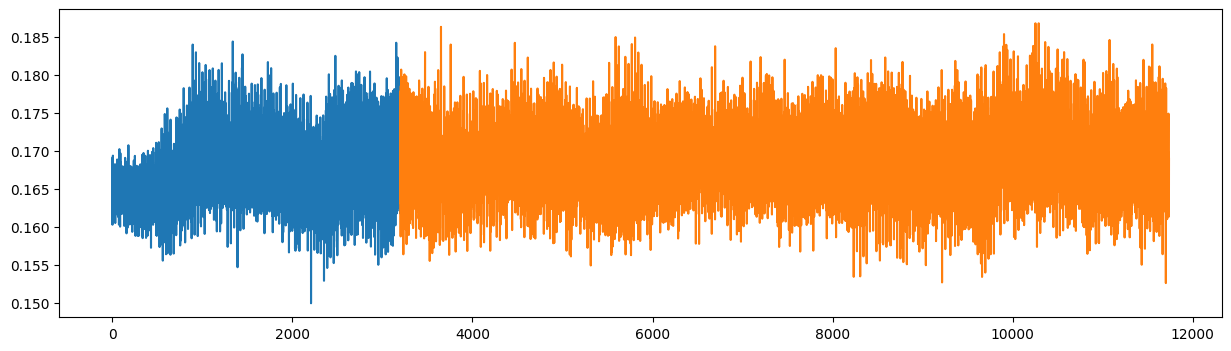

In [ ]:
params = np.load("../artifacts/fp_fit/smin_setting_1/fp_fit_method_0/abc_fixed_chain.npy")

burn = 3200

for param_no in range(18):
    # param_no = 2

    params_out = params[:(burn-1), :].T
    params_in = params[burn:, :].T

    param_in = params_in[param_no]
    param_out = params_out[param_no]

    plt.figure(figsize=(15, 4))
    plt.plot(list(range(0, burn-1)), param_out)
    plt.plot(list(range(burn, len(param_in) + burn)), param_in)

# Save the burn-in value as a file

In [38]:
survey_1 = np.load('../artifacts/fp_fit/smin_setting_1/fp_fit_method_0/all_combined_individual_chain.npy').T[2]
print(np.round(np.mean(survey_1), 3))
print(np.round(np.std(survey_1), 3))
# survey_2 = np.load('../artifacts/fp_fit/smin_setting_1/fp_fit_method_0/lamost_individual_chain.npy').T[3]

# np.absolute(np.mean(survey_1) - np.mean(survey_2)) / np.sqrt(np.std(survey_1)**2 + np.std(survey_2)**2)

-0.227
0.03


In [1]:
x = {
    "individual": {},
    "combined": {},
}

for _ in x:
    print(_)

individual
combined


# Tempel 2017

In [18]:
# Combine individual and group to get zcmb_group
df_gal = pd.read_csv("../data/external/tempel_group_sdss12/individual.txt", sep="\t")[["objID", "GroupID", "Ngal", "RAJ2000", "DEJ2000"]]
df_gal.rename({"objID": "objid", "Ngal": "Nr", "RAJ2000": "ra", "DEJ2000": "dec"}, axis=1, inplace=True)

df_group = pd.read_csv("../data/external/tempel_group_sdss12/group.txt", sep="\t")[["GroupID", "zcl"]]

df = df_gal.merge(df_group, on="GroupID", how="left").rename({"GroupID": "Group"}, axis=1)

df

,objid,Group,Nr,ra,dec,zcl
0,1237667108498440262,1,7,122.060976,16.369133,0.101547
1,1237667108498440277,1,7,122.020980,16.360701,0.101547
2,1237667142858899877,1,7,121.985850,16.422769,0.101547
3,1237667142858899914,1,7,121.975488,16.490585,0.101547
4,1237667142858899835,1,7,121.947446,16.394023,0.101547
...,...,...,...,...,...,...
584444,1237664092894789753,0,1,121.015654,19.738861,NaN
584445,1237673807046836467,0,1,127.134299,20.121031,NaN
584446,1237655368749482091,0,1,176.746476,61.334978,NaN
584447,1237668332032426040,0,1,230.474426,12.396286,NaN


In [24]:
pd.read_csv("/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/data/preprocessed/spectrophoto/lamost.csv")[["z_lamost", "tempel_counterpart", "zcl"]].head(20)

,z_lamost,tempel_counterpart,zcl
0,0.059419,False,0.097369
1,0.083816,False,0.097369
2,0.107839,False,0.097369
3,0.030054,False,NaN
4,0.036764,True,NaN
5,0.059872,True,NaN
6,0.036771,True,NaN
7,0.237433,False,0.096827
8,0.045660,True,0.046547
9,0.051058,True,NaN


In [97]:
df = pd.read_csv("/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/data/processed/rsi_derived/6dfgs.csv")[["zhelio", "z_cmb", "Group", "Nr", "cz_gr", "z_dist_est"]]
df["cz_gr"] = df["cz_gr"] / 299792.458

_ = df #df[(~df["zcl"].isna()) & (df["zcmb_group"].isna())]
_.sample(50)


,zhelio,z_cmb,Group,Nr,cz_gr,z_dist_est
4796,0.0399,0.040738,-1,1,0.000000,0.040738
5606,0.0365,0.036306,-1,1,0.000000,0.036306
6134,0.0478,0.047276,1146,90,0.046109,0.046109
2049,0.0309,0.031196,-1,1,0.000000,0.031196
2443,0.0366,0.037162,-1,1,0.000000,0.037162
2023,0.0290,0.029305,-1,1,0.000000,0.029305
3428,0.0236,0.024862,412,4,0.024874,0.024874
5140,0.0478,0.048058,-1,1,0.000000,0.048058
5986,0.0311,0.030505,512,3,0.027546,0.027546
3979,0.0497,0.050843,-1,1,0.000000,0.050843


In [ ]:
_ = df[~df["zcmb_group"].isna()]
# plt.hist(_["zcmb_group"] - _["z_dist_est"])

np.absolute(_["zcmb_group"] - _["z_dist_est"])

0.0

In [66]:
df = pd.read_csv("/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/data/preprocessed/spectrophoto/lamost.csv")

df[(df["zcl"].isna()) & (df["tempel_counterpart"] == True)]

,obsid,ra,dec,z_lamost,veldisp,veldisp_err,dist_x,tmass,glon,glat,...,fit_ok_h,log_r_h_app_k,log_r_h_smodel_k,log_r_h_model_k,fit_ok_k,tempel_counterpart,objid,Group,Nr,zcl
4,645015183,194.149399,62.352428,0.036764,83.0,7.0,0.000001,2MASXJ12563585+6221087,121.895,54.766,...,OK,0.633,0.621,0.575,OK,True,1237655464844329081,0,1,NaN
5,645007227,196.982605,59.513191,0.059872,194.0,4.0,0.000001,2MASXJ13075582+5930474,119.040,57.490,...,OK,0.364,0.365,0.131,OK,True,1237655108380590125,0,1,NaN
6,645015155,193.053604,62.967171,0.036771,85.0,7.0,0.000001,2MASXJ12521286+6258018,122.781,54.161,...,OK,0.484,0.488,0.385,OK,True,1237655370900308067,0,1,NaN
9,211605229,149.132966,9.822199,0.051058,207.0,6.0,0.003918,2MASXJ09563191+0949199,227.173,45.358,...,OK,0.969,0.953,0.943,OK,True,1237660669815357578,0,1,NaN
18,284510132,174.390107,32.245493,0.132844,144.0,14.0,0.007288,2MASXJ11373362+3214437,190.785,73.185,...,OK,0.400,0.401,0.205,OK,True,1237665330385322078,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63077,417503025,171.382041,0.438599,0.025949,73.0,15.0,1.497509,2MASXJ11253159+0026194,261.682,56.269,...,OK,0.374,0.378,0.209,OK,True,1237674650998669361,0,1,NaN
63094,566503082,230.250095,4.957917,0.051676,93.0,4.0,1.663326,2MASXJ15210000+0457301,7.784,48.063,...,OK,0.513,0.506,0.432,OK,True,1237655743484330266,0,1,NaN
63100,425301058,180.292216,22.670949,0.084063,193.0,7.0,1.741016,2MASXJ12011024+2240162,231.550,77.769,...,OK,0.471,0.476,0.358,OK,True,1237667735580704795,0,1,NaN
63108,531405113,185.648545,24.085563,0.004662,51.0,8.0,1.878527,2MASXJ12223570+2405063,236.420,82.823,...,OK,0.620,0.629,0.589,OK,True,1237667446193258589,0,1,NaN


In [68]:
# Open cluster and group data (Tempel et al. 2017)
df_gal = pd.read_csv("../data/external/tempel_group_sdss12/individual.txt", sep="\t")[["objID", "GroupID", "Ngal", "RAJ2000", "DEJ2000"]]
df_gal.rename({"objID": "objid", "Ngal": "Nr"}, axis=1, inplace=True)
df_group = pd.read_csv("../data/external/tempel_group_sdss12/group.txt", sep="\t")[["GroupID", "zcl"]]
df_tempel = df_gal.merge(df_group, on="GroupID", how="left").rename({"GroupID": "Group"}, axis=1)

df_tempel

,objid,Group,Nr,RAJ2000,DEJ2000,zcl
0,1237667108498440262,1,7,122.060976,16.369133,0.101547
1,1237667108498440277,1,7,122.020980,16.360701,0.101547
2,1237667142858899877,1,7,121.985850,16.422769,0.101547
3,1237667142858899914,1,7,121.975488,16.490585,0.101547
4,1237667142858899835,1,7,121.947446,16.394023,0.101547
...,...,...,...,...,...,...
584444,1237664092894789753,0,1,121.015654,19.738861,NaN
584445,1237673807046836467,0,1,127.134299,20.121031,NaN
584446,1237655368749482091,0,1,176.746476,61.334978,NaN
584447,1237668332032426040,0,1,230.474426,12.396286,NaN


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  6.,  5., 21., 33.,
        51., 72., 68., 79., 53., 42., 34., 16., 10.,  5.,  3.]),
 array([2.63806338, 2.64545861, 2.65285384, 2.66024907, 2.66764431,
        2.67503954, 2.68243477, 2.68983001, 2.69722524, 2.70462047,
        2.7120157 , 2.71941094, 2.72680617, 2.7342014 , 2.74159664,
        2.74899187, 2.7563871 , 2.76378233, 2.77117757, 2.7785728 ,
        2.78596803, 2.79336327, 2.8007585 , 2.80815373, 2.81554896,
        2.8229442 , 2.83033943, 2.83773466, 2.8451299 , 2.85252513,
        2.85992036, 2.86731559, 2.87471083, 2.88210606, 2.88950129,
        2.89689652, 2.90429176, 2.91168699, 2.91908222, 2.92647746,
        2.93387269, 2.94126792, 2.94866315, 2.95605839, 2.96345362,
        2.97084885, 2.97824409, 2.98563932, 2.99303455, 3.00042978,
        3.00782502]),
 <BarContainer

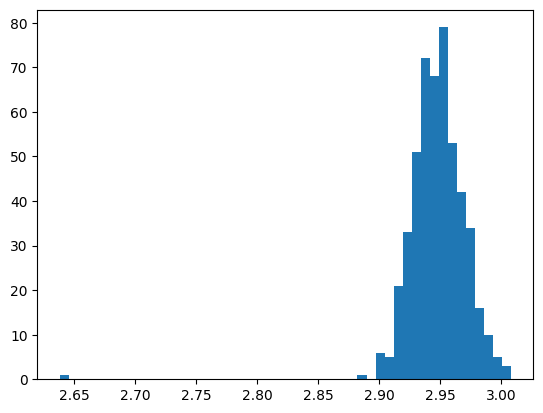

In [100]:
plt.hist(np.load("../artifacts/veldisp_calibration/k_lamost_sdss_fid.npy"), bins=50)

In [112]:
df1 = pd.read_csv("../data/external/h22/cullan_logdist.csv")[["objid", "zcmb_group", "logdist_corr"]]
df1["objid"] = df1["objid"].apply(lambda x: "SDSS" + str(x))

df2 = pd.read_csv("../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv")[["objid", "z_dist_est", "logdist_common_abc", "logdist_individual"]]

df = df2.merge(df1, on="objid")
df["delta_logdist"] = df["logdist_individual"] - df["logdist_corr"]

df[df["delta_logdist"] > 0.2]
# plt.scatter(df["z_dist_est"], df["delta_logdist"])


,objid,z_dist_est,logdist_common_abc,logdist_individual,zcmb_group,logdist_corr,delta_logdist
121,SDSS1237665372257452080,0.04178,0.117375,0.128807,0.04178,-0.140216,0.269023


# Generate random uniform points on a sphere

In [20]:
N = 100000

# In phi
phi = 2 * np.pi * np.random.uniform(0, 1, size=N)

# In theta
theta = np.arcsin(2 * np.random.uniform(0, 1, size=N) - 1)

df = pd.DataFrame(data={
    'phi': phi,
    'theta': theta
})

# Convert to degrees
df = df * 180 / np.pi

df.to_csv("../etc/random_points_sphere.csv", index=False)

# NaN observational errors

In [ ]:
for survey in SURVEY_LIST:
    df = pd.read_csv(f"../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
    N = df['logdist_obs_err_common_abc'].isna().sum()

    x = df['logdist_err_common_abc']

    # print(f"Imaginary observational errors in {survey}: {N}")
    print(survey)
    for z in [0.01, 0.02, 0.03, 0.04, 0.05]:
        print(f"Number of galaxy with z < 0.03: {len(df[df['z_dist_est'] <= 0.03])}")

Number of galaxy with z < 0.03: 1506
Number of galaxy with z < 0.03: 1138
Number of galaxy with z < 0.03: 574


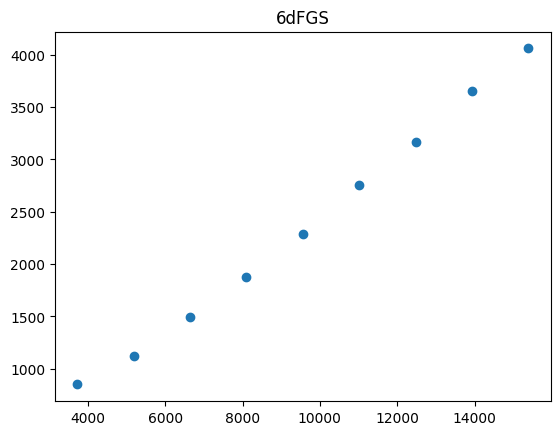

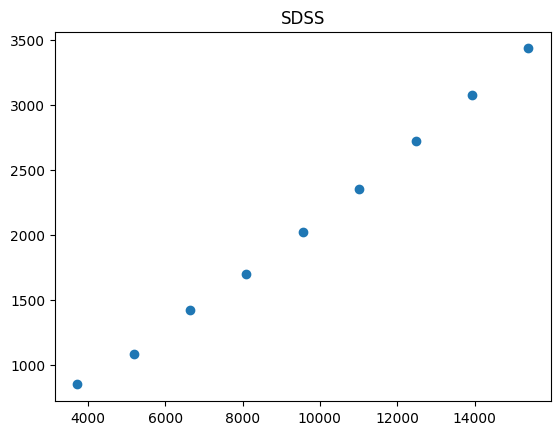

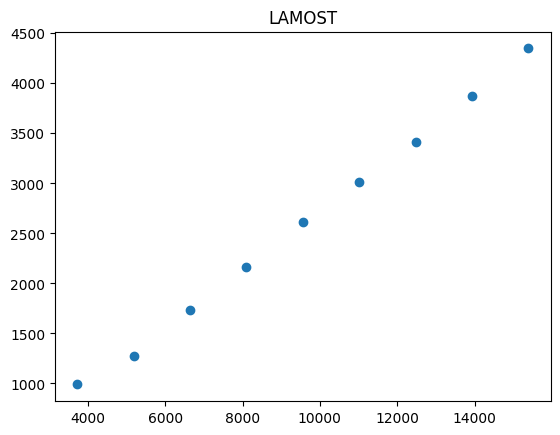

In [16]:
for survey in SURVEY_LIST:
    df = pd.read_csv(f"../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")

    df["pv_err"] = LIGHTSPEED * df['z_dist_est'] * df[f"logdist_err_common_abc"] * np.log(10) / (1 + 0.75 * df['z_dist_est'])

    x = df['z_dist_est'].to_numpy()
    y = df['pv_err'].to_numpy()
    yerr = 1.0

    x_bin, y_bin, _, _ = bin_data_median(x, y, yerr, ZMIN, ZMAX, 10)

    plt.figure()
    plt.title(survey)

    plt.scatter(x_bin * LIGHTSPEED, y_bin)

In [14]:
from main_code.step_12_smoothed_field import combine_my_logdist

df = combine_my_logdist()

for z in [0.01, 0.02, 0.03, 0.04, 0.05]:
    print(f"Number of galaxy with z <= {z}: {len(df[df['z_dist_est'] <= z])}")

Number of galaxy with z <= 0.01: 0
Number of galaxy with z <= 0.02: 772
Number of galaxy with z <= 0.03: 3030
Number of galaxy with z <= 0.04: 6793
Number of galaxy with z <= 0.05: 10566


0.0152968521501674

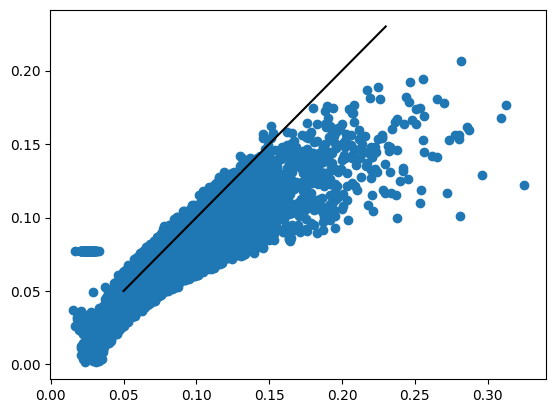

In [20]:
df = pd.read_csv("../data/foundation/logdist/smin_setting_1/fp_fit_method_0/6dfgs.csv")

plt.scatter(df['logdist_obs_err_nominal_common_abc'], df['logdist_obs_err_common_abc'])
plt.plot([0.05, 0.23], [0.05, 0.23], c='k')

df['logdist_obs_err_nominal_common_abc'].min()

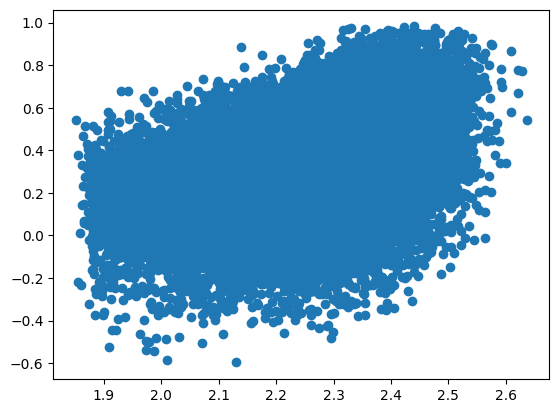

In [3]:
df = pd.read_csv("../data/external/h22/cullan_logdist.csv")

plt.scatter(df['i'], df['r'])